In [9]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline  
# %matplotlib notebook
# %pylab
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import time

### Ax: considering each column in A, aka finding significant signal senders
(Rows are normalized, each row sum to 1)

In [10]:
data = np.load('adaptive_adj_F_restlongIN.npy')
data = data.sum(1)
data.shape

(8384, 200)

In [3]:
data

array([[ 0.20087063,  0.21283445,  0.17136031, ...,  0.8476267 ,
         0.5167642 ,  0.48347434],
       [ 0.26213264,  0.32687044,  0.2212674 , ...,  0.9100429 ,
        13.749225  ,  0.05047144],
       [ 0.1478503 ,  3.6617136 ,  0.07754859, ...,  0.11809278,
         0.06558138,  1.1742706 ],
       ...,
       [ 0.06950301,  0.65791863,  0.8518741 , ...,  0.26228815,
         0.5594423 ,  0.21553698],
       [ 0.02077393,  0.04808842,  0.2553263 , ...,  0.07564638,
         0.32335111,  0.04632097],
       [ 0.07993254,  0.19297943,  0.12389471, ...,  1.0204165 ,
         1.9875576 ,  0.12715203]], dtype=float32)

Explained variation per principal component: [0.13512832 0.07343551 0.04970045 0.04870739 0.0397384  0.02904211
 0.02747328 0.02508621 0.02226611 0.01984923 0.0171376  0.01545358
 0.01330921 0.01209795 0.01198279]
Total explanability: 0.5404082


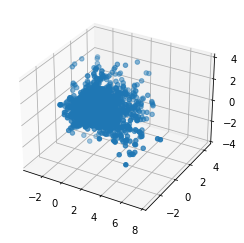

In [11]:
pca = PCA(n_components=15)
pca_result = pca.fit_transform(data)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total explanability:', pca.explained_variance_ratio_.sum())

ax = plt.figure().gca(projection='3d')
ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8384 samples in 0.137s...
[t-SNE] Computed neighbors for 8384 samples in 27.311s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8384
[t-SNE] Computed conditional probabilities for sample 2000 / 8384
[t-SNE] Computed conditional probabilities for sample 3000 / 8384
[t-SNE] Computed conditional probabilities for sample 4000 / 8384
[t-SNE] Computed conditional probabilities for sample 5000 / 8384
[t-SNE] Computed conditional probabilities for sample 6000 / 8384
[t-SNE] Computed conditional probabilities for sample 7000 / 8384
[t-SNE] Computed conditional probabilities for sample 8000 / 8384
[t-SNE] Computed conditional probabilities for sample 8384 / 8384
[t-SNE] Mean sigma: 0.383053
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.185959
[t-SNE] KL divergence after 300 iterations: 3.413176
t-SNE done! Time elapsed: 40.2276725769043 seconds


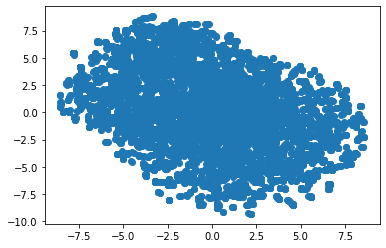

In [12]:
# tsne from data
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 8384 samples in 0.016s...
[t-SNE] Computed neighbors for 8384 samples in 1.971s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8384
[t-SNE] Computed conditional probabilities for sample 2000 / 8384
[t-SNE] Computed conditional probabilities for sample 3000 / 8384
[t-SNE] Computed conditional probabilities for sample 4000 / 8384
[t-SNE] Computed conditional probabilities for sample 5000 / 8384
[t-SNE] Computed conditional probabilities for sample 6000 / 8384
[t-SNE] Computed conditional probabilities for sample 7000 / 8384
[t-SNE] Computed conditional probabilities for sample 8000 / 8384
[t-SNE] Computed conditional probabilities for sample 8384 / 8384
[t-SNE] Mean sigma: 0.182413
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.656296
[t-SNE] KL divergence after 300 iterations: 3.289164
t-SNE done! Time elapsed: 10.116600036621094 seconds


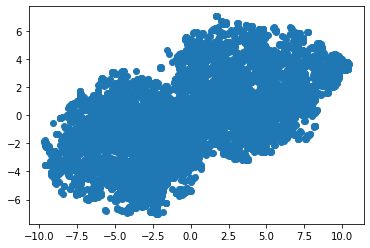

In [13]:
# tsne from pca results
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
plt.scatter(tsne_results[:,0], tsne_results[:,1])
plt.show()

In [14]:
# population mean
mean_data = data.sum(0)

[ 13  16  18  19  21  22  24  28  35  39  40  41  42  43  44  45  46  48
  49  50  51  52  53  54  55  59  61  62  63  64  65  71  76  81  82  83
  85  88  89  90  91  92  93  94  95  99 114 115 118 119 120 121 122 124
 125 128 129 135 137 138 139 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 160 161 162 163 166 167 168 169 170 171 174 175
 176 177 178 179 180 185 187 188 189 191 192 193 197 200]


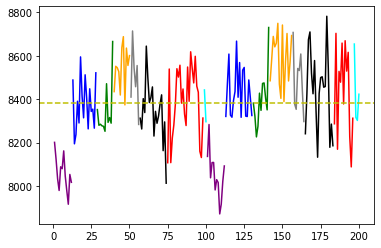

In [15]:
plt.plot(np.arange(1,13), mean_data[:12], 'purple') #Vis
plt.plot(np.arange(13,29), mean_data[12:28], 'b') #SomMot
plt.plot(np.arange(29,40), mean_data[28:39], 'g') #DorsAttn
plt.plot(np.arange(40,51), mean_data[39:50], 'orange') #SalVentAttn
plt.plot(np.arange(51,57), mean_data[50:56], 'grey') #Limbic
plt.plot(np.arange(57,75), mean_data[56:74], 'black') #Cont
plt.plot(np.arange(75,99), mean_data[74:98], 'r') #default
plt.plot(np.arange(99,101), mean_data[98:100], 'cyan') #TempPar
plt.plot(np.arange(101,113), mean_data[100:112], 'purple') #vis
plt.plot(np.arange(113,131), mean_data[112:130], 'b') #SomMot
plt.plot(np.arange(131,142), mean_data[130:141], 'g') #DorsAttn
plt.plot(np.arange(142,157), mean_data[141:156], 'orange') #SalVentAttn
plt.plot(np.arange(157,165), mean_data[156:164], 'grey') #Limbic
plt.plot(np.arange(165,184), mean_data[164:183], 'black') #Cont
plt.plot(np.arange(184,197), mean_data[183:196], 'r') #default
plt.plot(np.arange(197,201), mean_data[196:200], 'cyan') #TempPar
plt.axhline(y=mean_data.mean(), color='y', linestyle='--')
print((np.asarray(np.where(mean_data > mean_data.mean()))+1).squeeze())

[  1  13  15  16  17  18  19  20  21  22  24  25  27  28  29  30  31  32
  35  36  37  38  39  40  41  43  44  45  46  48  50  57  60  61  62  63
  64  65  71  73  76  79  81  82  83  85  86  88  90  91  92  93  94  95
  99 100 101 102 113 114 115 117 118 119 120 121 122 123 124 125 127 128
 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 145 146 147
 148 149 150 152 153 156 160 167 168 169 176 178 179 180 182 185 187 189
 190 191 192 193 197 198 199]


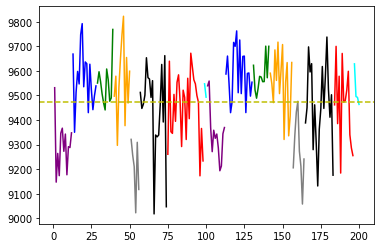

In [8]:
### adaptive adj from hidden dimension 5's theta
plt.plot(np.arange(1,13), mean_data[:12], 'purple') #Vis
plt.plot(np.arange(13,29), mean_data[12:28], 'b') #SomMot
plt.plot(np.arange(29,40), mean_data[28:39], 'g') #DorsAttn
plt.plot(np.arange(40,51), mean_data[39:50], 'orange') #SalVentAttn
plt.plot(np.arange(51,57), mean_data[50:56], 'grey') #Limbic
plt.plot(np.arange(57,75), mean_data[56:74], 'black') #Cont
plt.plot(np.arange(75,99), mean_data[74:98], 'r') #default
plt.plot(np.arange(99,101), mean_data[98:100], 'cyan') #TempPar
plt.plot(np.arange(101,113), mean_data[100:112], 'purple') #vis
plt.plot(np.arange(113,131), mean_data[112:130], 'b') #SomMot
plt.plot(np.arange(131,142), mean_data[130:141], 'g') #DorsAttn
plt.plot(np.arange(142,157), mean_data[141:156], 'orange') #SalVentAttn
plt.plot(np.arange(157,165), mean_data[156:164], 'grey') #Limbic
plt.plot(np.arange(165,184), mean_data[164:183], 'black') #Cont
plt.plot(np.arange(184,197), mean_data[183:196], 'r') #default
plt.plot(np.arange(197,201), mean_data[196:200], 'cyan') #TempPar
plt.axhline(y=mean_data.mean(), color='y', linestyle='--')
print((np.asarray(np.where(mean_data > mean_data.mean()))+1).squeeze())

[  1  13  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
  31  32  33  35  36  38  39  40  41  44  45  46  48  50  57  59  60  61
  62  64  71  73  76  79  82  85  86  90  99 101 102 113 114 115 117 118
 119 120 121 122 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 152 153 156 166 167
 168 169 174 176 178 179 181 182 184 185 189 190 192 193 197 198 199 200]


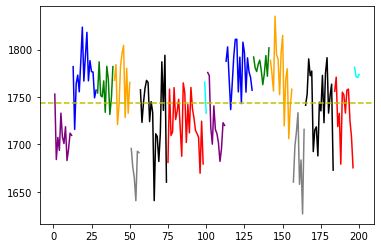

In [50]:
### adaptive adj from hidden dimension 10's theta
plt.plot(np.arange(1,13), mean_data[:12], 'purple') #Vis
plt.plot(np.arange(13,29), mean_data[12:28], 'b') #SomMot
plt.plot(np.arange(29,40), mean_data[28:39], 'g') #DorsAttn
plt.plot(np.arange(40,51), mean_data[39:50], 'orange') #SalVentAttn
plt.plot(np.arange(51,57), mean_data[50:56], 'grey') #Limbic
plt.plot(np.arange(57,75), mean_data[56:74], 'black') #Cont
plt.plot(np.arange(75,99), mean_data[74:98], 'r') #default
plt.plot(np.arange(99,101), mean_data[98:100], 'cyan') #TempPar
plt.plot(np.arange(101,113), mean_data[100:112], 'purple') #vis
plt.plot(np.arange(113,131), mean_data[112:130], 'b') #SomMot
plt.plot(np.arange(131,142), mean_data[130:141], 'g') #DorsAttn
plt.plot(np.arange(142,157), mean_data[141:156], 'orange') #SalVentAttn
plt.plot(np.arange(157,165), mean_data[156:164], 'grey') #Limbic
plt.plot(np.arange(165,184), mean_data[164:183], 'black') #Cont
plt.plot(np.arange(184,197), mean_data[183:196], 'r') #default
plt.plot(np.arange(197,201), mean_data[196:200], 'cyan') #TempPar
plt.axhline(y=mean_data.mean(), color='y', linestyle='--')

print((np.asarray(np.where(mean_data > mean_data.mean()))+1).squeeze())

https://github.com/ThomasYeoLab/CBIG/blob/master/stable_projects/brain_parcellation/Schaefer2018_LocalGlobal/Parcellations/MNI/Schaefer2018_200Parcels_17Networks_order.txt

**check: 13-50, 113-156** (additional: 75-89, 175-200)

**SomMot(somatomotor), DorsAttn(dorsal attention), SalVentAttn(salience/ventral attention)**
(13-50 LH and 113-156 RH)

DMN: 75-98, 184-196


"Also, to see if the revealed channel-wise topology resembled the intrinsic network organization of the brain, we sorted the 62 channels into 6 groups to represent the activity of previously established resting-state networks41 (RSNs). These included the visual (VN), somatomotor (SM), dorsal attention (DA), ventral attention and limbic (VAL), frontoparietal (FP) and default mode (DMN) networks." from https://www.nature.com/articles/s41598-019-49726-5

Other resources regarding resting state networks:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3174820/ (7/17 networks --- Actually Schaefer2018 parcellation is based on this!)

<IPython.core.display.Javascript object>


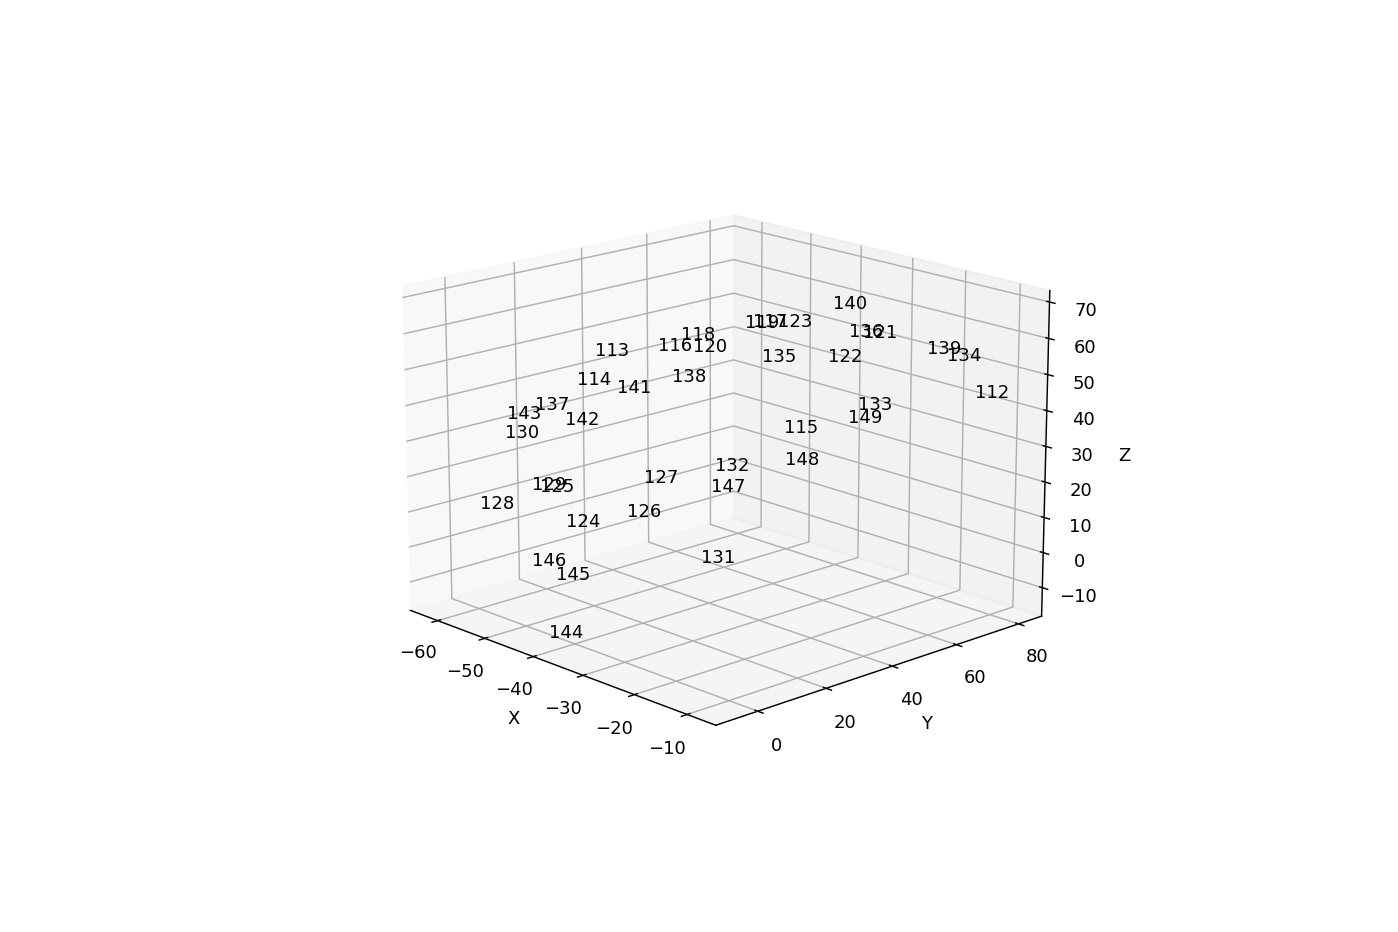

In [26]:
coor_mri = np.loadtxt('/host/data/MRI_EEG/utils/eeg_coor_conv/Schaefer2018_200Parcels_17Networks_order_FSLMNI152_2mm.txt', usecols=(3,4,5,6))

coor_mean = []

for i in range(112,150):
    cur_coor = list(coor_mri[coor_mri[:,-1] == i][:,:3].mean(0))
    cur_coor.append(i)
    coor_mean.append(cur_coor)

coor_mean = np.stack(coor_mean).astype(np.float16)

'''plot region number in 3d space'''
fig = plt.figure()
ax = fig.gca(projection='3d')
for i in range(len(coor_mean)):
    ax.text(coor_mean[i,0], coor_mean[i,1], coor_mean[i,2], str(int(coor_mean[i,3])))

ax.set_xlim(coor_mean[:,0].min()-1, coor_mean[:,0].max()+1)
ax.set_ylim(coor_mean[:,1].min()-1, coor_mean[:,1].max()+1)
ax.set_zlim(coor_mean[:,2].min()-1, coor_mean[:,2].max()+1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()